<a href="https://colab.research.google.com/github/shimaaahmedd/Image-processing/blob/main/Image_processing_filters_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
from scipy import signal
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Image Cartoonifying**

**Reading and converting to gray scale**

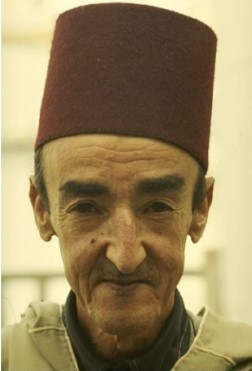

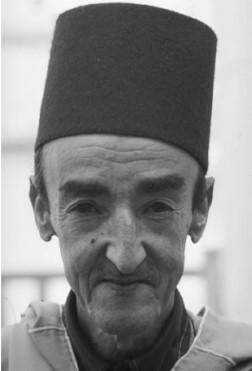

(371, 252)

In [ ]:
img = cv2.imread("/content/drive/MyDrive/Image processing/old_man.jpg")
img_gray = cv2.imread("/content/drive/MyDrive/Image processing/old_man.jpg", 0)
cv2_imshow(img)
cv2_imshow(img_gray)
img_gray.shape

**Median filter to reduce noise and preserve the edge**

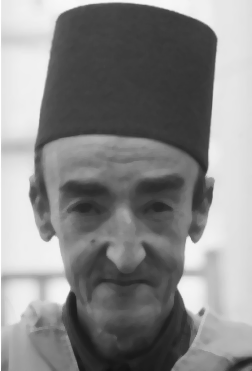

In [ ]:
img_median = cv2.medianBlur(img_gray, 5)  # order of submatrix (5, 5)
cv2_imshow(img_median)

**Laplacian filter to detect edge**

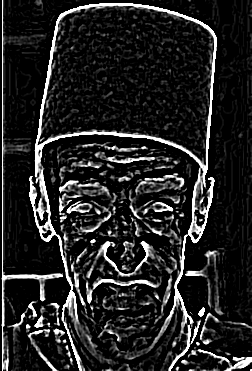

In [ ]:
img_laplacian = cv2.Laplacian(img_median,cv2.CV_64F, ksize=5)
cv2_imshow(img_laplacian)

**Thresholding**

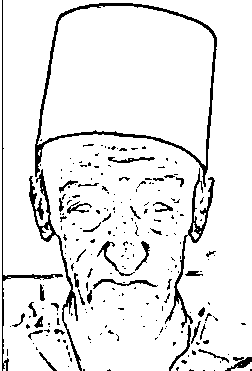

In [ ]:
ret, thresh = cv2.threshold(img_laplacian, 170, 255, cv2.THRESH_BINARY_INV)
cv2_imshow(thresh)

**Generating a color painting and a cartoon**

**Resize image**

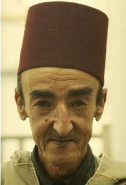

(185, 126, 3)

In [ ]:
img_resized = cv2.resize(img, (int(img.shape[1]/2), int(img.shape[0]/2)))
cv2_imshow(img_resized)
img_resized.shape

**Bilateral filter**

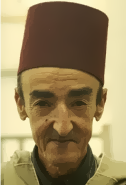

In [ ]:
img_bilateral = cv2.bilateralFilter(img_resized, 9, 9, 7)
for i in range(3):
  img_bilateral = cv2.bilateralFilter(img_bilateral, 9, 9, 7)
cv2_imshow(img_bilateral)

**Resize it to original photo**

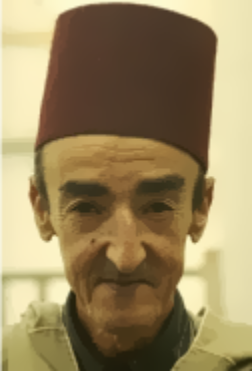

(371, 252, 3)

In [ ]:
img_large = cv2.resize(img_bilateral, (img.shape[1], img.shape[0]))
cv2_imshow(img_large)
img_large.shape

**Change Edge from gray to RGB**

In [ ]:
data = thresh.astype(np.uint8)
thresh = cv2.cvtColor(data,cv2.COLOR_GRAY2RGB)
thresh.shape

(371, 252, 3)

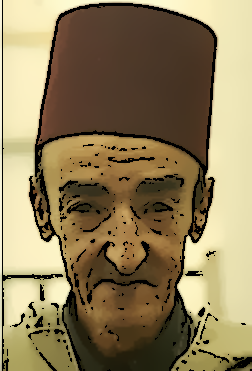

In [ ]:
img_cartoon = cv2.bitwise_and(img_large, thresh)
cv2_imshow(img_cartoon)

# **Road Lane Detection Using Hough Transform**

**Read image and change to gray scale**


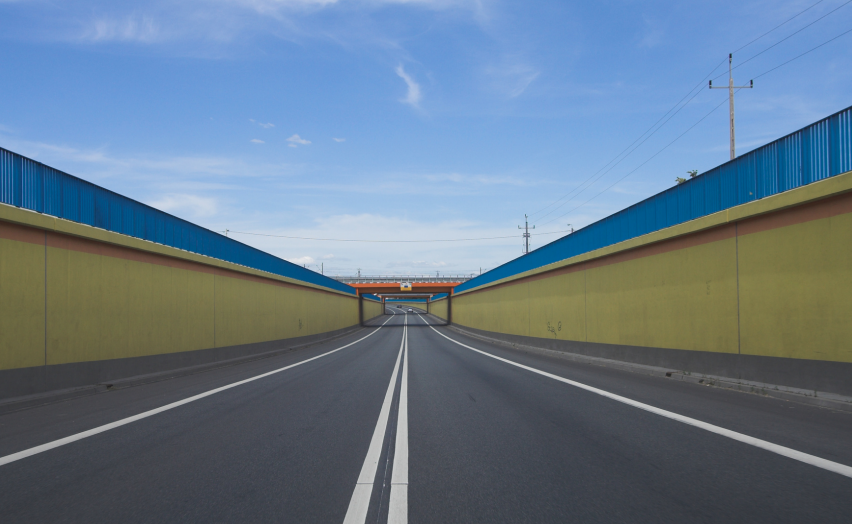

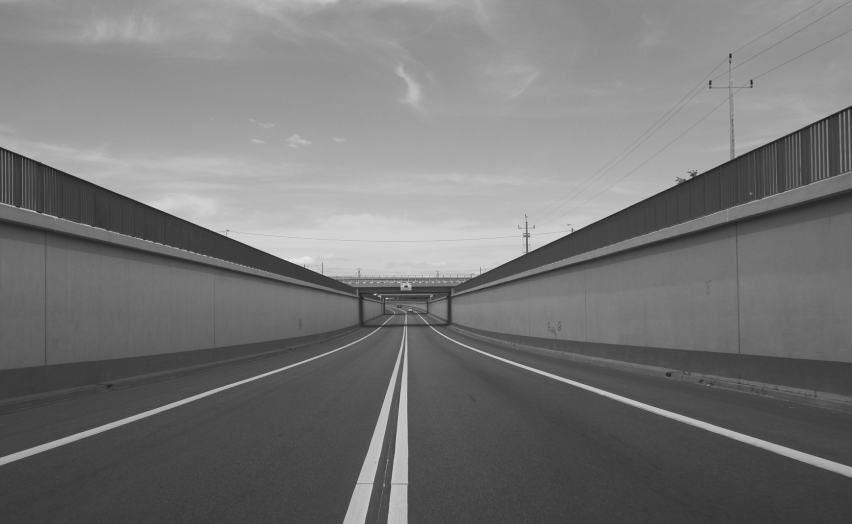

(524, 852)


(524, 852, 3)

In [ ]:
road_img = cv2.imread("/content/drive/MyDrive/Image processing/testHough1.png")
road_img_gray = cv2.imread("/content/drive/MyDrive/Image processing/testHough1.png", 0)
cv2_imshow(road_img)
cv2_imshow(road_img_gray)
print(road_img_gray.shape)
road_img.shape

**Smoothing using median filter**

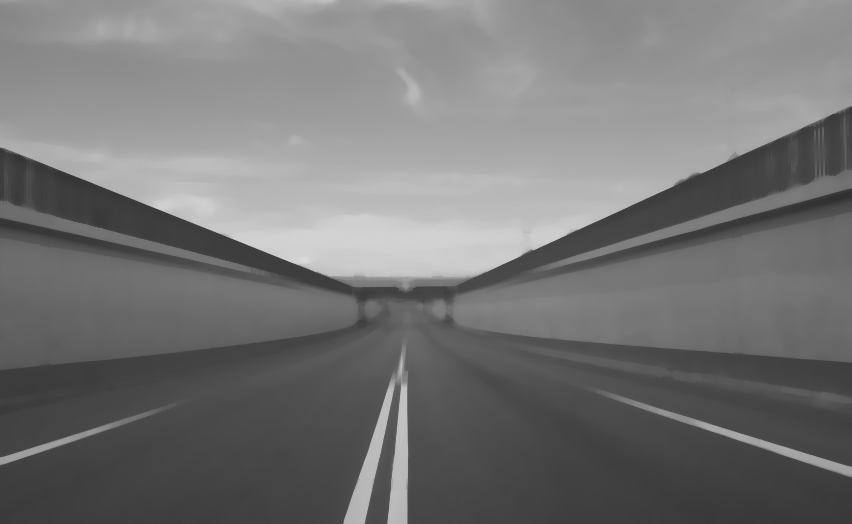

(48, 217)

In [ ]:
road_img_median = cv2.medianBlur(road_img_gray, 11)  # order of submatrix (11, 11)
cv2_imshow(road_img_median)
road_img_median.min(), road_img_median.max()

**Canny built in as a reference**

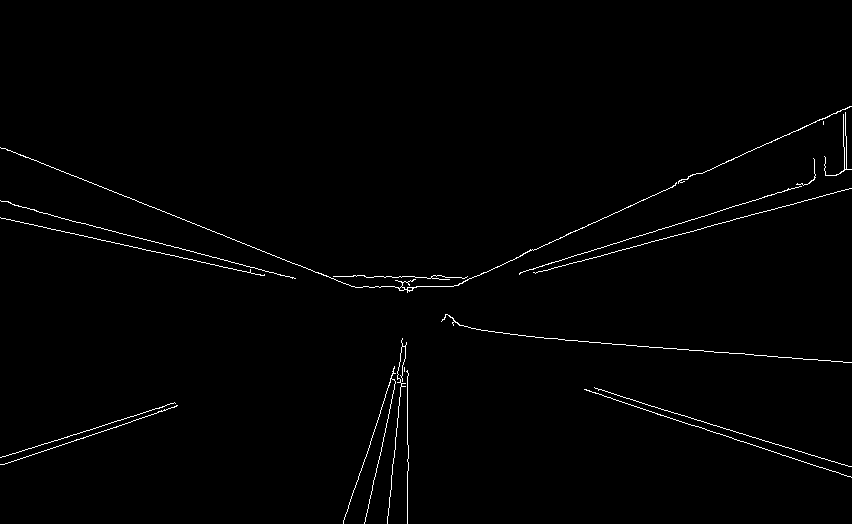

In [ ]:
mid = cv2.Canny(road_img_median, 30, 170)
cv2_imshow(mid)

**Canny's from scratch**

**Gradients**

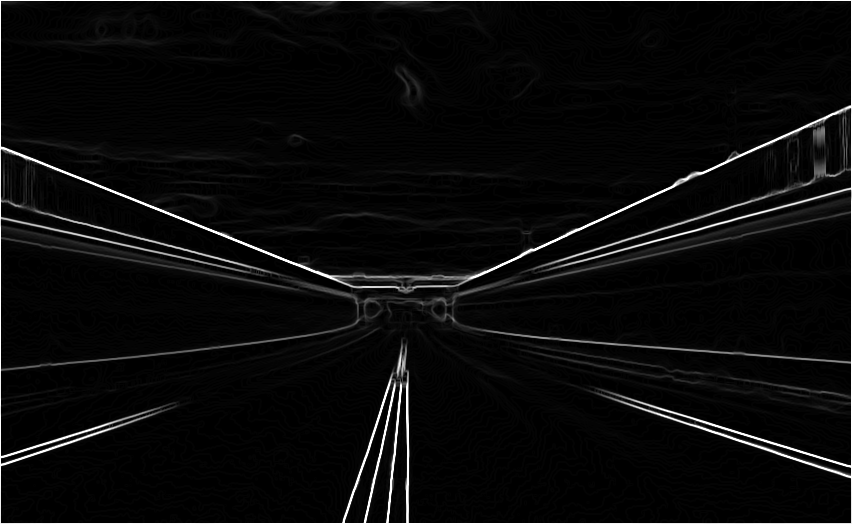

(524, 852)

In [ ]:
filter_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])      #Sobel filter
filter_y = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])      #Sobel filter flipped transpose
Ix = signal.convolve2d(road_img_median, filter_x, mode='same') #output has same  size
Iy = signal.convolve2d(road_img_median, filter_y, mode='same') #output has same  size
grad_mag = np.sqrt(np.square(Ix) + np.square(Iy))
grad_phase = np.arctan2(Iy, Ix)
grad_phase = np.rad2deg(grad_phase)
grad_phase += 180
cv2_imshow(grad_mag)
grad_mag.shape

**Non-Max suppression**

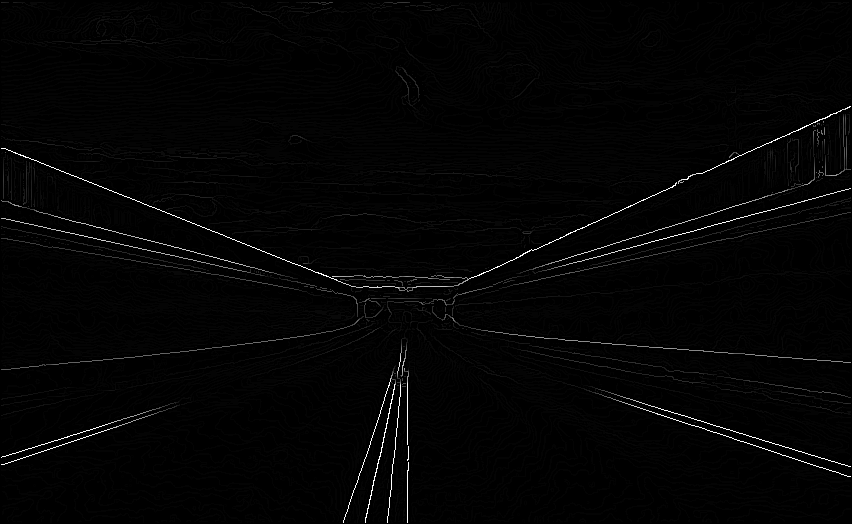

(524, 852)

In [ ]:
initate_mat = np.zeros((grad_mag.shape[0], grad_mag.shape[1]))
for i in range(1, grad_mag.shape[0] - 1):
  for j in range(1, grad_mag.shape[1] - 1):
    q = 255
    r = 255
    if (0 <= grad_phase[i,j] < 22.5) or (337.5 <= grad_phase[i,j] <= 360):
          q = grad_mag[i, j-1]
          r = grad_mag[i, j+1]
    elif (22.5 <= grad_phase[i,j] < 67.5) or (202.5 <= grad_phase[i,j] < 247.5):
          q = grad_mag[i+1, j-1]
          r = grad_mag[i-1, j+1]
    elif (67.5 <= grad_phase[i,j] < 112.5) or (247.5 <= grad_phase[i,j] < 292.5):
           q = grad_mag[i-1, j]
           r = grad_mag[i+1, j]
    else:
          q = grad_mag[i-1, j-1]
          r = grad_mag[i+1, j+1]
    if (grad_mag[i,j] >= q) and (grad_mag[i,j] >= r):
        initate_mat[i,j] = grad_mag[i,j]
cv2_imshow(initate_mat)
initate_mat.shape

**Threshold**

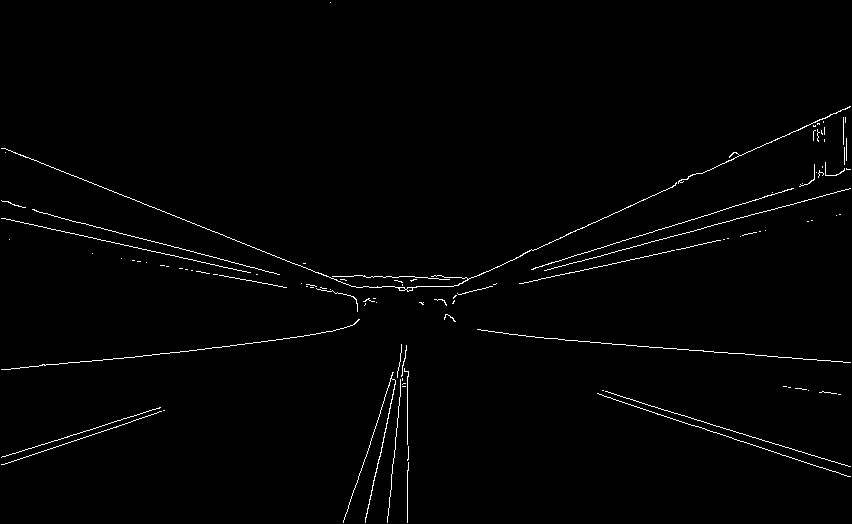

(524, 852)

In [ ]:
highThreshold = initate_mat.max()*0.1
lowThreshold = initate_mat.max()
result = np.zeros(initate_mat.shape)
strong = 255
weak = 0
strong_i, strong_j = np.where(initate_mat >= highThreshold)
weak_i, weak_j = np.where((initate_mat <= highThreshold) & (initate_mat >= lowThreshold))
result[strong_i, strong_j] = strong
result[weak_i, weak_j] = weak
cv2_imshow(result)
result.shape

**Region of interest**

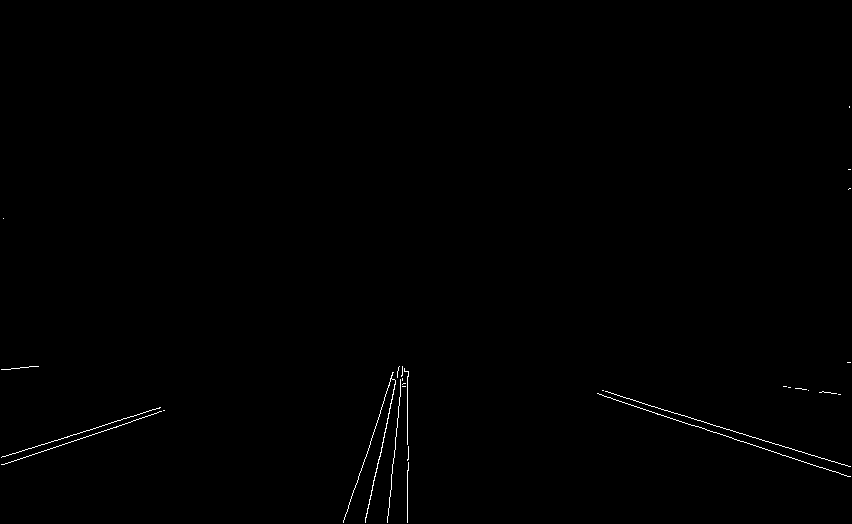

(524, 852)

In [ ]:
height = result.shape[0]
width = result.shape[1]
roi_vertices = [(0,height),(3,height*0.4),(5,height*0.7),(width-5,height*0.7),(width-3,height*0.1),(width,height)]
mask = np.zeros_like(result)
cv2.fillPoly(mask,np.int32([roi_vertices]),255) 
masked_image=cv2.bitwise_and(result,mask)
cv2_imshow(masked_image)
masked_image.shape

**Hough Transform lines**

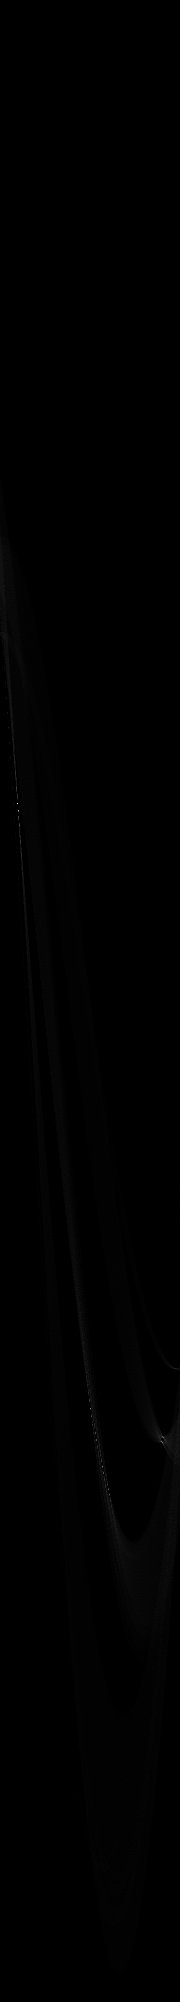

In [ ]:
height, width = masked_image.shape                      # we need heigth and width to calculate the diag
img_diagonal = np.ceil(np.sqrt(height**2 + width**2))   # max rho is the diagonal
rhos = np.arange(-img_diagonal, img_diagonal, 1)
thetas = np.deg2rad(np.arange(-90, 90, 1))
hough_space=np.zeros((len(rhos), len(thetas)), dtype=np.uint64)

y_idxs, x_idxs = np.nonzero(masked_image)               # find all edge (nonzero) pixel indexe
for i in range(len(x_idxs)):                            # cycle through edge points
    x = x_idxs[i]
    y = y_idxs[i]
    for j in range(len(thetas)): # cycle through thetas and calc rho
        rho = int((x * np.cos(thetas[j]) +
                   y * np.sin(thetas[j])) + img_diagonal)
        hough_space[rho, j] += 1
cv2_imshow(hough_space)

**Changing rho and theta to equation of line and drawing them**

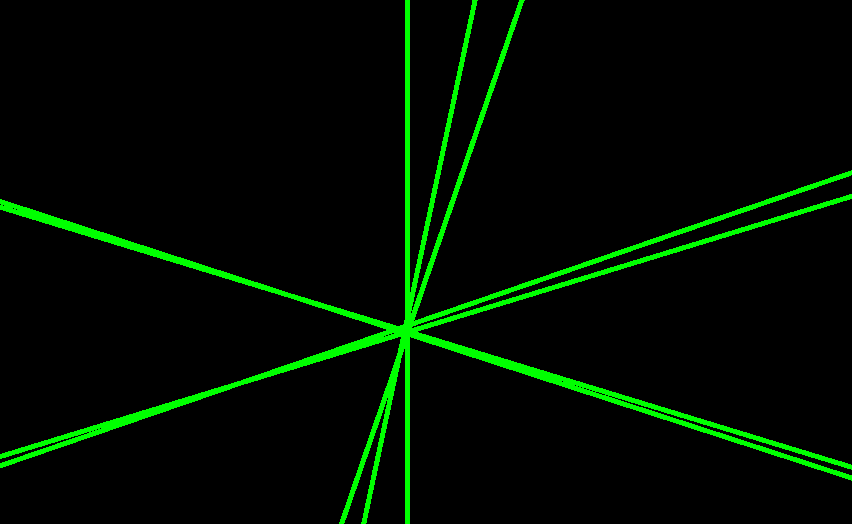

In [ ]:
line_image = np.zeros(road_img.shape)
img = np.copy(road_img)
indicies =  np.argpartition(hough_space.flatten(), -2)[-7:]             #Getting max 7 votes after partition and flatten #argpartition it partions the given array (arrange)
indicies= np.vstack(np.unravel_index(indicies, hough_space.shape)).T    #unravel_index convert indicies to the shape of hough space  # stack the indexes to be each in a row
for i in range(len(indicies)):
    rho = rhos[indicies[i][0]]
    theta = thetas[indicies[i][1]]
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a * rho
    y0 = b * rho
    x1 = int(x0 + 1500 * (-b))
    y1 = int(y0 + 1500 * (a))
    x2 = int(x0 - 1500 * (-b))
    y2 = int(y0 - 1500 * (a))
    cv2.line(line_image, (x1, y1), (x2, y2),(0, 255, 0), 3)
cv2_imshow(line_image)

**Getting the Region of interest of lines and masking it with original photo**

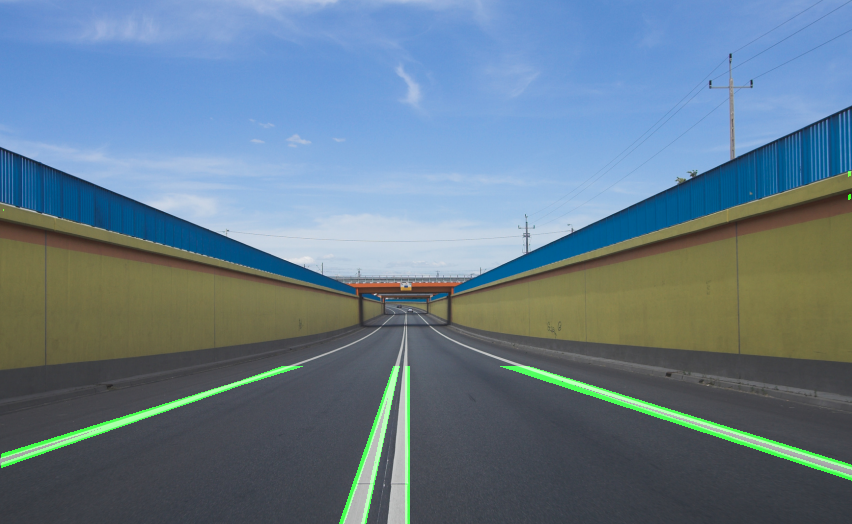

In [ ]:
mask_temp = mask.copy()
mask_temp = mask_temp.astype(np.uint8)                  #cv2.cvtColor accepts 8 bits only
mask_rgb = cv2.cvtColor(mask_temp, cv2.COLOR_GRAY2RGB)  #changing to RGB to mask correctly
line_image = line_image.astype(np.uint8)
cut_line=cv2.bitwise_and(line_image, mask_rgb)
final_image = cv2.bitwise_or(img, cut_line)
cv2_imshow(final_image)